<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC1</p>
<p style="margin: 0; text-align:right;">2021-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Preparación de datos

A lo largo de esta práctica veremos como aplicar distintas técnicas para la carga y preparación de datos:

 <ol start="1">
  <li>Carga de conjuntos de datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
  <li>Reducción de dimensionalidad</li>
  <li>Entrenamiento y test</li>
</ol>

**Importante:** Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

**Importante:** Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de cada PEC. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.
   
Para ello vamos a necesitar las siguientes librerías:

In [77]:
from six import StringIO

from IPython.display import Image 
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
import numpy as np
import seaborn as sns
import matplotlib.colors as pltcol
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)

# 1. Carga del conjunto de datos (1 punto)

En primer lugar, deberéis cargar el conjunto de datos Breast Cancer Wisconsin (más información en https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Éste se puede descargar de Internet o puede ser cargado directamente usando una librería de "scikit-learn", que incorpora un conjunto de datasets muy conocidos y empleados para minería de datos y machine learning (https://scikit-learn.org/stable/datasets.html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> cargad el conjunto de datos "Breast Cancer Wisconsin" y mostrad:
   <br> - El número y nombre de los atributos (variables que podrían ser usadas para predecir la respuesta "Diagnosis")
    <br> - El número de filas obtenidas
    <br> - Verificad si hay o no datos que faltan ("missing values") y en qué columnas
<hr>
Sugerencia: si usáis sklearn (sklearn.datasets.load_breast_cancer), explorad las diferentes keys del objeto obtenido.

Sugerencia: quizá os resulta útil pasar los datos (atributos + target) a un dataframe de pandas.
</div>

In [2]:
# Cargando el dataset desde la librería scikit-learn
data = datasets.load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# Descripción de la data
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
print(data["feature_names"])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print("- El número de atributos:" , len(data["feature_names"]))
print("- Nombre de los atributos:" , data["feature_names"])
print("- Número de filas obtenidas:" , data["data"].shape[0])

- El número de atributos: 30
- Nombre de los atributos: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
- Número de filas obtenidas: 569


In [6]:
# Creando el dataframe con pandas
ds_cancer = pd.concat([pd.DataFrame(data=data["data"], columns=data["feature_names"]),
                       pd.DataFrame(data=data["target"], columns=["target"])], axis=1)
ds_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
ds_cancer.isnull().values.any() #valores perdidos en dataset

False

In [8]:
ds_cancer.isnull().any() # valores perdidos por columnas en el dataset

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
target    

# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> realizad un análisis estadístico básico:
    <br> - Ilustrad gráficamente la frecuencia de aparición de las variables categóricas, indicando el número.
    <br> - Calculad para cada atributo numérico del conjunto de datos, su valor medio y desviación estándard. 
<hr>
Sugerencia: podeis usar la librería 'pandas' y sus funciones 'describe' y 'value_counts'
</div>

In [9]:
freq_class = ds_cancer['target'].value_counts()
freq_class

1    357
0    212
Name: target, dtype: int64

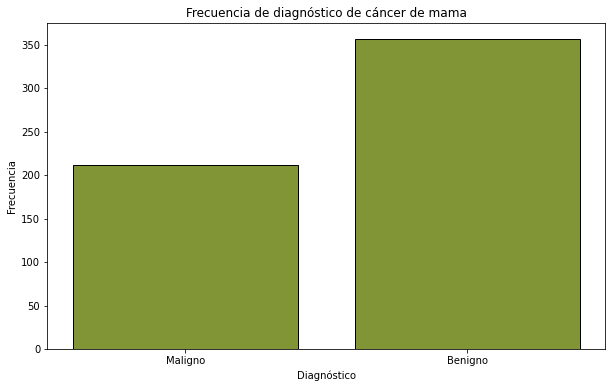

In [10]:
plt.figure(figsize=(10,6))
plt.bar(freq_class.index.values, freq_class, color = "#819536", edgecolor= "black", align="center")
plt.xticks(freq_class.index.values, ('Benigno', 'Maligno'))
plt.ylabel('Frecuencia')
plt.xlabel('Diagnóstico')
plt.title("Frecuencia de diagnóstico de cáncer de mama");

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comentad los resultados.
</div>

##### **Respuesta:**

Los resultados obtenidos en la frecuencia de valores en las clases indican lo siguiente: 

* 1 (Benigno) -> Indica la **ausencia** de celulas cancerígenas
* 0 (Maligno) -> Indica la **presencia** de célular cancerígenas

> *357 observaciones indican la ausencia de células cancerígenas (benigno) y 212 muestran las presencia de células cancerígenas (maligno)*.

In [11]:
ds_cancer.drop(['target'], axis=1).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 2.2 Análisis exploratorio de los datos

En este ejercicio vamos a explorar la relación de algunos de los atributos numéricos con la variable respuesta ("Diagnosis"), tanto gráficamente como cuantitativamente y analizaremos las distintas correlaciones. Para empezar, seleccionad los 4 atributos que queréis explorar. Si habéis usado los nombres de columnas proporcionados por sklearn, una lista de posibles nombres de atributos serían:

In [12]:
feats_to_explore = ['mean radius', 'mean texture', 'mean smoothness', 'mean symmetry']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> utilizando una librería gráfica, como por ejemplo "matplotlib", realizad un gráfico del histograma de valores para cada uno de los atributos seleccionados, separados por los valores de clase de la respuesta ("Diagnosis"). 
    
 La finalidad es observar como se distribuye cada uno de los atributos en función del valor de clase que toman, para poder identificar de forma visual y rápida si algunos atributos permiten diferenciar de forma clara los diferentes diagnósticos de los tumores.
<hr>
Sugerencia: podéis usar el parámetro "alpha" en los gráficos para que se aprecien los tres histogramas.
</div>

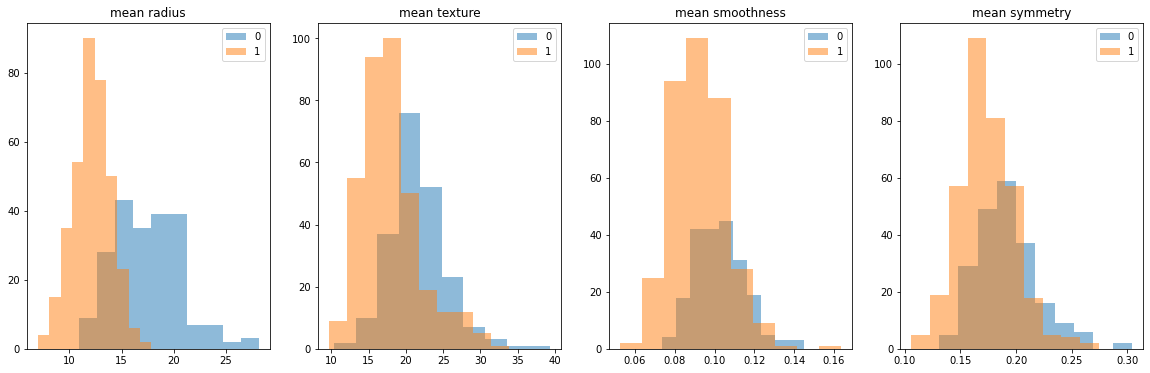

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(20,6))

for i, classDiag in enumerate(feats_to_explore):
    for cancer in ds_cancer["target"].unique():
        ax[i].hist(ds_cancer.loc[ds_cancer["target"]==cancer, classDiag], alpha=0.5, label=cancer)
        ax[i].set_title(classDiag)
        ax[i].legend(loc='upper right')


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando los gráficos, ¿qué atributos te parece que tienen valores claramente diferentes para diagnósticos benignos y malignos? ¿Qué atributos no?</div>

##### **Respuesta:**

Los atributos que tienen valores diferentes para la diagnosis de malignos y benignos son:

* *mean radius*
* *mean texture*

Por el contrario, los atributos que tienen valores similares para la diagnosis son: 

* *mean smoothness*
* *mean symmetry*

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada uno de los atributos representados en el ejercicio anterior, mostrad la media y la desviación estándard para cada valor de clase de la respuesta. 
    
La finalidad es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
</div>

In [14]:
ds_cancer.agg({'mean radius': ['mean','std'],
               'mean texture': ['mean','std'],
              'mean smoothness': ['mean','std'],
              'mean symmetry': ['mean','std']}) 

,mean radius,mean texture,mean smoothness,mean symmetry
mean,14.127292,19.289649,0.096360,0.181162
std,3.524049,4.301036,0.014064,0.027414


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando a los valores medios y desviaciones estándard calculadas, ¿te parecen significativas las diferencias para diagnósticos benignos y malignos?</div>

##### **Respuesta:**

> Numéricamente podemos verificar el análisis anterior respecto a los atributos seleccionados. Los atributos *mean radius* y *mean texture* tienen una desviación estandar mayor, por lo que refleja la dispersión en sus valores alrededor de la media. Por el contrario, *mean smoothness* y *mean symmetry* tienen una desviación estandar menor, que se corresponde con los observado en las gráficas, indicando una dispersión inferior respecto a la media.

> Al estar analizando ciertos atributos para la diagnosis de tumores benignos o malignos y encontrar una mayor dispersión respecto de la media de los mismos, podemos determinar que existe una relación directa entre la dispersión de valores y el número de diagnósticos malignos, ya que a medida que los valores se alejan de la media se entiende que son valores anormales que están asociados con la presencia de células cancerígenas.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> calculad y mostrad la correlación entre todas las variables del conjunto de datos.
</div>

Text(1, 40, 'Autor: Gabriel P. Bonilla')

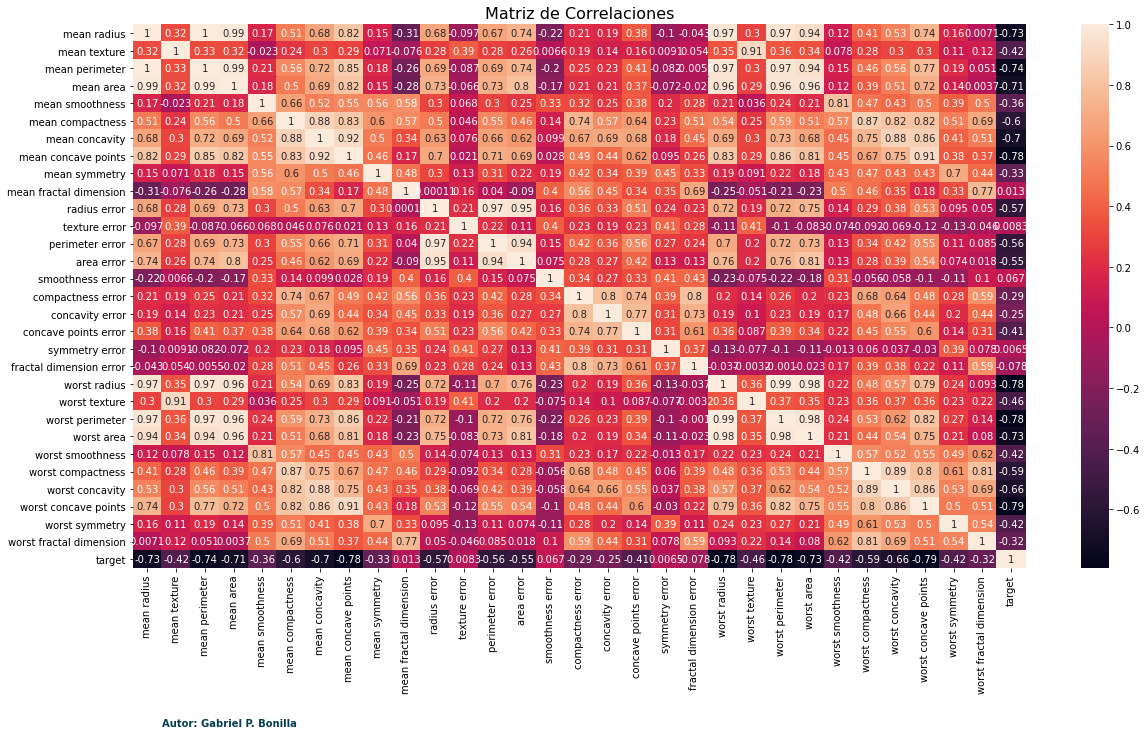

In [15]:
correlaciones = ds_cancer.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlaciones, annot = True)
plt.title('Matriz de Correlaciones', fontsize=16)
plt.text(x=1, y=40, s="Autor: Gabriel P. Bonilla", fontsize=10, fontweight='bold', color='#063f50')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> representad gráficamente las relaciones entre todas las parejas de las variables "mean" del conjunto de datos.

La finalidad de este ejercicio es poder observar y analizar las correlaciones de manera gráfica entre algunas de las variables.
<hr>Sugerencia: podéis usar la función "pairplot" de la librería 'seaborn'.
</div>

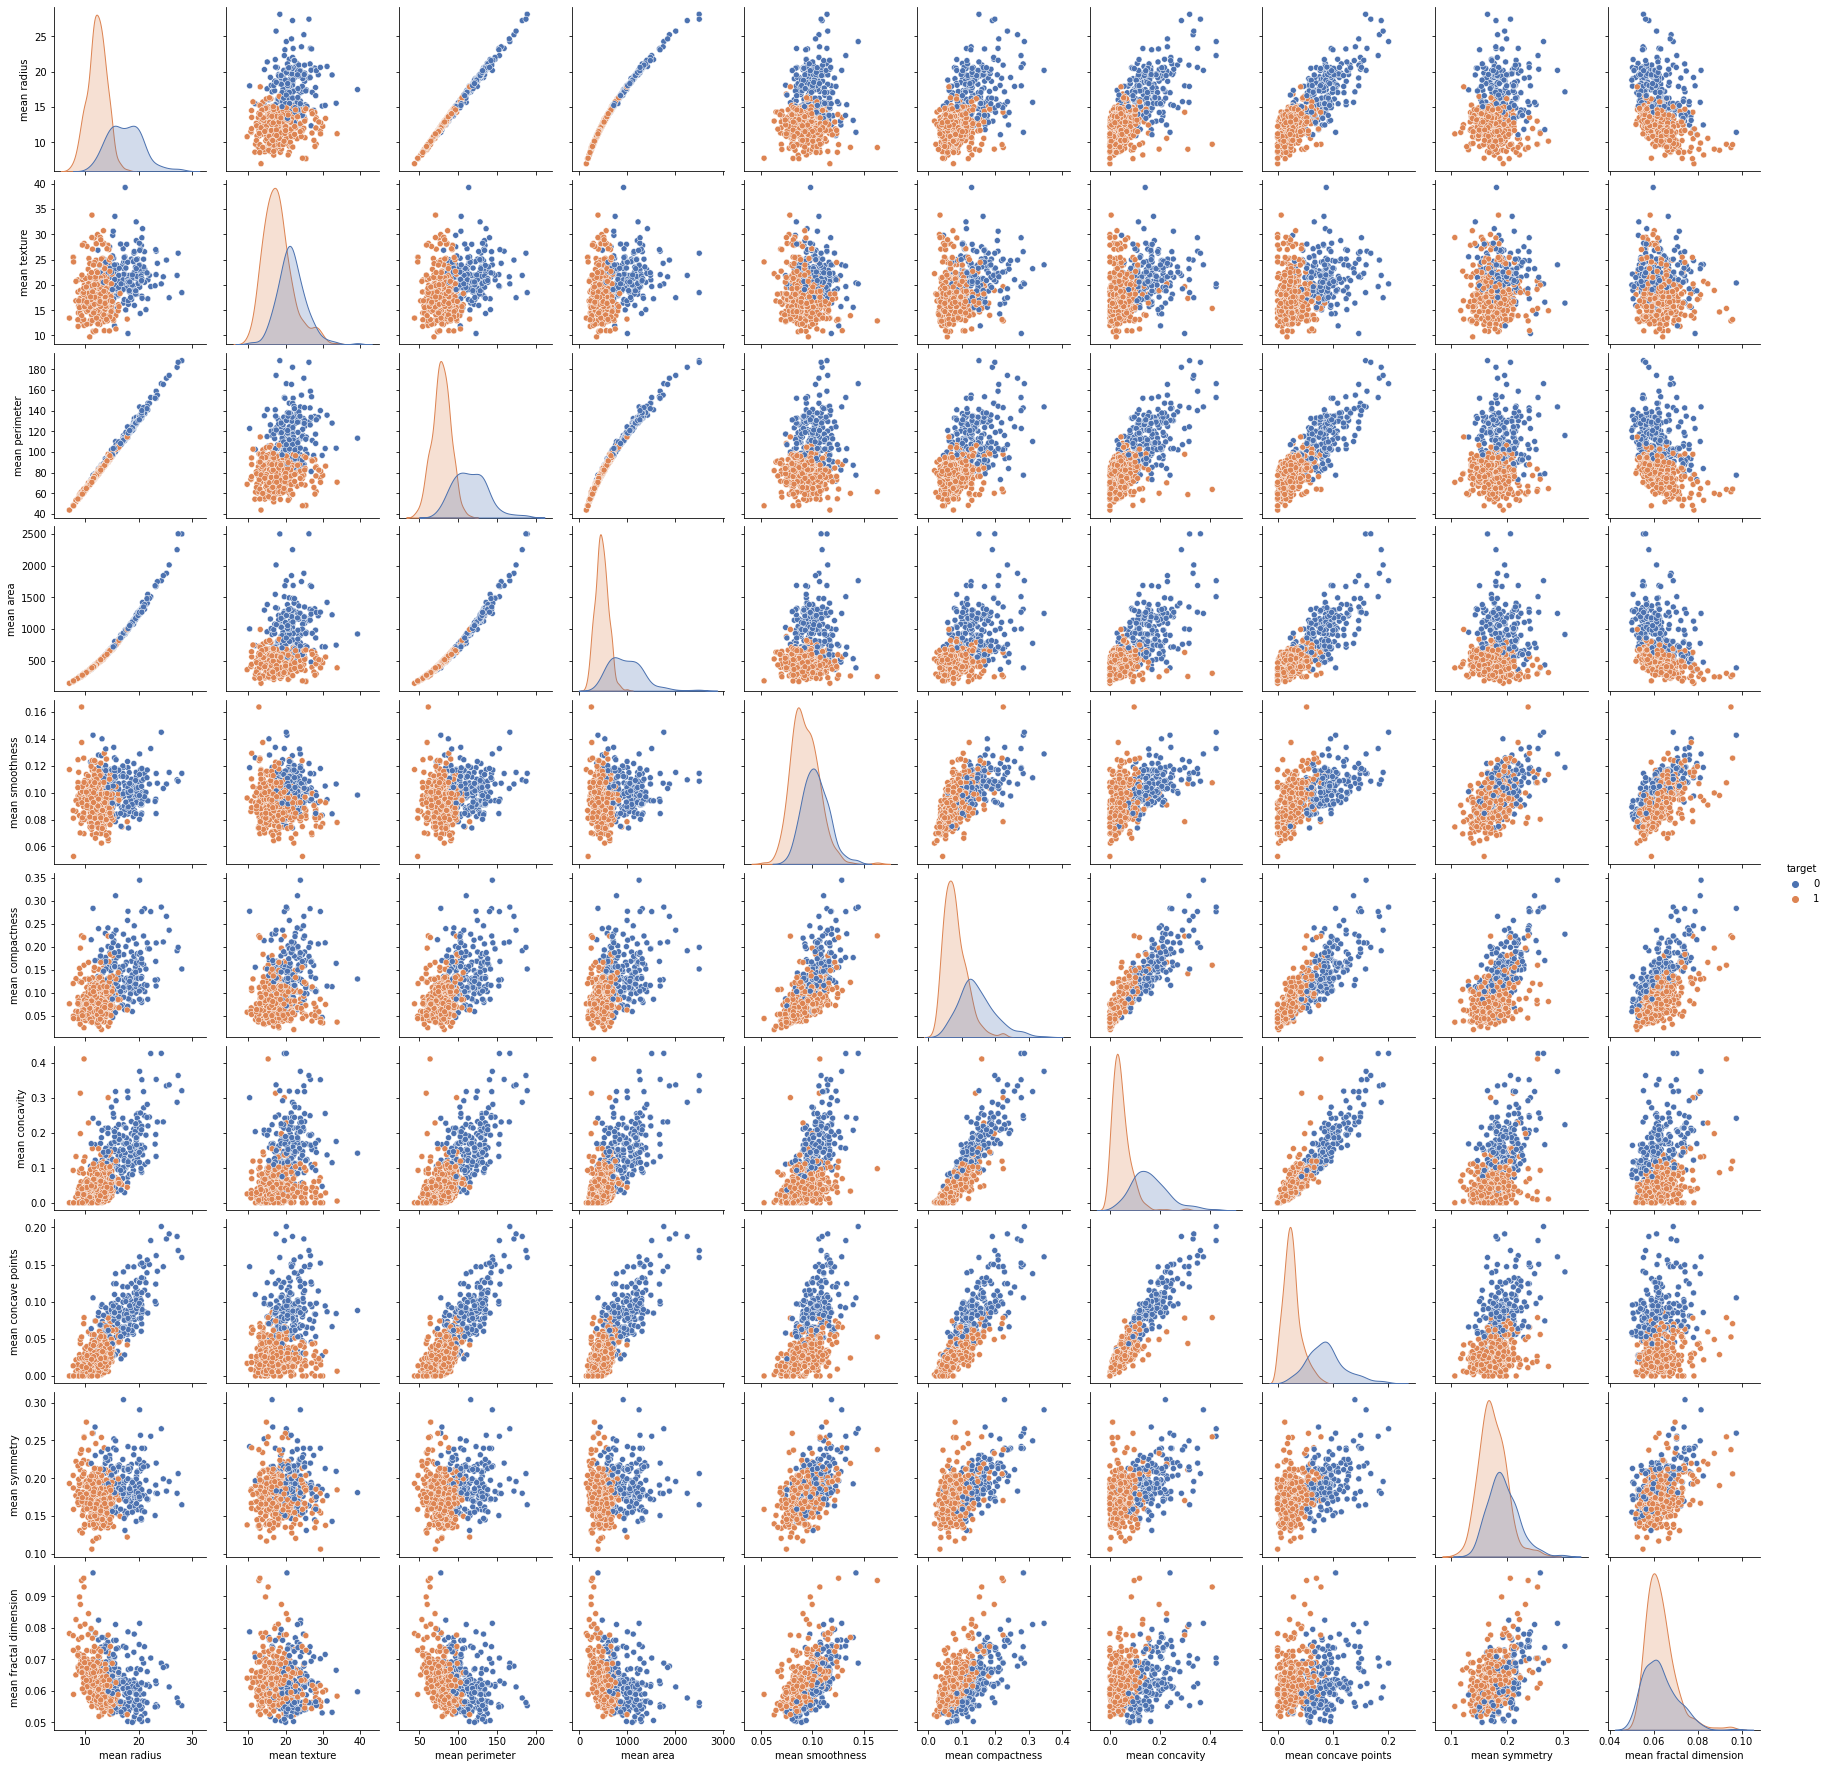

In [16]:
# Usando el palette de: https://seaborn.pydata.org/examples/color_palettes.html

ds_means = ds_cancer[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension', "target"]]
sns.pairplot(ds_means, hue="target", palette="deep")

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> determinad cuáles son las variables con una correlación superior al 90% y cread un nuevo conjunto de datos (dataframe) eliminando estas variables.
</div>

In [23]:
# Tomado el ejemplo del link: https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

# Realizar una copia del dataframe original
ds_cancer1 = ds_cancer.copy()

# Crear la matriz de correlaciones
corr_matriz = ds_cancer1.corr().abs()

# Seleccionar el triangulo superior de la matriz de correlaciones
upper = corr_matriz.where(np.triu(np.ones(corr_matriz.shape), k=1).astype(np.bool))

# Encontrar los atributos con correlación mayor a 90% (0.90)
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Eliminar atributos
df_cancer = ds_cancer1.drop(to_drop, axis=1)

print(); print(df_cancer.head(5))


   mean radius  mean texture  mean smoothness  mean compactness  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   mean concavity  mean symmetry  mean fractal dimension  radius error  \
0          0.3001         0.2419                 0.07871        1.0950   
1          0.0869         0.1812                 0.05667        0.5435   
2          0.1974         0.2069                 0.05999        0.7456   
3          0.2414         0.2597                 0.09744        0.4956   
4          0.1980         0.1809                 0.05883        0.7572   

   texture error  smoothness error  compactness error  concavity error  \
0         0.9053          0.006399            0.04904          0.05373   
1  

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando las correlaciones, ¿qué variables son las que tienen una correlación más fuerte y han sido eliminadas? ¿Qué efecto puede tener en el resultado final el hecho de elminarlas o no?
</div>

> La variables que tienen las correlaciones más fuertes (> 90%) son: *mean perimeter*, *mean area*, *mean concave points*, *perimeter error*, *area error*, *worst radius*, *worst texture*, *worst perimeter*, *worst area*, *worst concave points*. 

> Puede ayudar a reducir el coste computacional al eliminar el número de variables dependientes. En el caso de estudio se redujo de 30 atributos a 10, lo que es una mejora considerable al momento de procesar el dataframe. También se obtiene una mejora en la capacidad predictiva del modelo que ha sido entrenado con el dataset depurado.

*Fuente: https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python*

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Bonus:</strong>
<br> - ¿Qué test estadístico podrías usar para comparar las distribuciones de los valores de los atributos cuando los diagnósticos son benignos o malignos? Úsalo para evaluar qué atributos (de entre todos los del conjunto de datos) tienen valores más parecidos en tumores benignos y malignos. Interpreta el resultado.
    </div>

# 3. Reducción de dimensionalidad (3 puntos)

En este ejercicio deberéis aplicar métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con menos dimensiones.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> aplicad el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones:
<br>- El conjunto de datos original
<br>- El conjunto de datos al cual se le han extraído las variables fuertemente correlacionadas

NOTA: Tened cuidado y no incluyáis la variable objetivo "Diagnosis" a la reducción de dimensionalidad. Queremos poder explicar la variable objetivo en funcion del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: no es necesario que programéis los algoritmos, podéis hacer uso de las implementaciones disponibles en la librería "scikit-learn".
</div>

In [51]:
# Quitar la variable target
X = ds_cancer.drop('target', 1)
Y = ds_cancer['target']
# Importar el módulo StandardScaler
ss = preprocessing.StandardScaler()
# Normalizar los atributos
X_norm = ss.fit_transform(X)
# Revisar la media y desviación estándar de los datos normalizados
np.mean(X_norm),np.std(X_norm)

(-6.826538293184326e-17, 1.0)

In [83]:
pca_cancer = PCA(n_components=2)
X_pca = pca_cancer.fit_transform(X_norm)
print("Varianza explicada:", pca_cancer.explained_variance_ratio_)
print("Varianza acumulada:", sum(pca_cancer.explained_variance_ratio_))

Varianza explicada: [0.44272026 0.18971182]
Varianza acumulada: 0.6324320765155951


In [42]:
# Tomado de: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

# Creo un dataframe con los dos componentes principales obtenidos
pca2_cancer = pd.DataFrame(data = X_pca
             , columns = ['Componente Principal 1', 'Componente Principal 2'])
# Visualizo los 5 primeras filas del dataframe
pca2_cancer.head()

,Componente Principal 1,Componente Principal 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


#### Ahora vamos a realizar el mismo proceso para el dataset reducido a 20 variables

In [52]:
# Quitar la variable target
X_red = df_cancer.drop('target', 1)
Y_red = df_cancer['target']
# Importar el módulo StandardScaler
scaler = preprocessing.StandardScaler()
# Normalizar los atributos
X_norm_red = ss.fit_transform(X_red)
# Revisar la media y desviación estándar de los datos normalizados
np.mean(X_norm_red),np.std(X_norm_red)

(-1.9355733575187264e-17, 1.0)

In [46]:
pca_cancer_red = PCA(n_components=2)
X_pca_red = pca_cancer_red.fit_transform(X_norm_red)
print("Varianza explicada:", pca_cancer_red.explained_variance_ratio_)
print("Varianza acumulada:", sum(pca_cancer_red.explained_variance_ratio_))

Varianza explicada: [0.42612628 0.1345146 ]
Varianza acumulada: 0.5606408718895893


In [47]:
# Tomado de: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

# Creo un dataframe con los dos componentes principales obtenidos
pca2_cancer_red = pd.DataFrame(data = X_pca_red
             , columns = ['Componente Principal 1', 'Componente Principal 2'])
# Visualizo los 5 primeras filas del dataframe
pca2_cancer_red.head()

,Componente Principal 1,Componente Principal 2
0,7.284671,-1.208272
1,-0.935879,-1.832680
2,3.151689,-1.903739
3,11.347898,2.319947
4,1.384769,-0.726613


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> generad un gráfico (en 2D) con el resultado del PCA usando colores diferentes para cada clase de la respuesta, con el objetivo de visualizar si es posible separar eficientemente las clases empleando este método.</div>

#### Para el dataset original

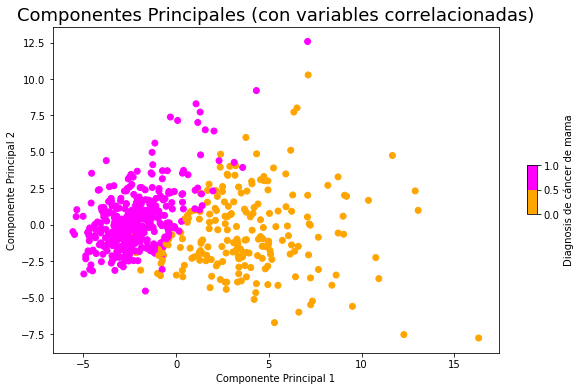

In [81]:
cmap = pltcol.ListedColormap(['orange', 'magenta'])
plt.figure(figsize=(10,6))
plt.title("Componentes Principales (con variables correlacionadas)", fontsize=18)
ps = plt.scatter(X_pca[:,0], X_pca[:,1], c=Y, cmap=cmap)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
cbar=plt.colorbar(ps, shrink =0.15, aspect = 5)
cbar.set_label("Diagnosis de cáncer de mama")
plt.show()

#### Para el dataset sin variables altamente correlacionadas

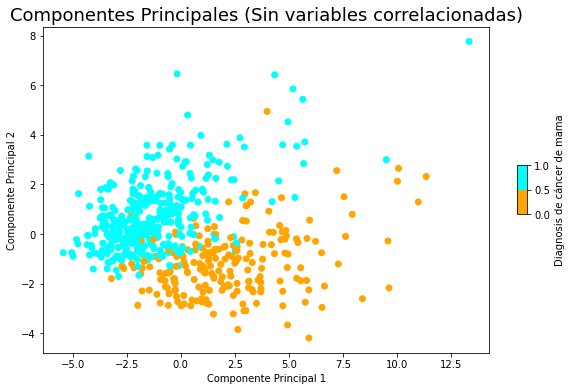

In [58]:
cmap = pltcol.ListedColormap(['orange', 'cyan'])
plt.figure(figsize=(10,6))
plt.title("Componentes Principales (Sin variables correlacionadas)", fontsize=18)
ps = plt.scatter(X_pca_red[:,0], X_pca_red[:,1], c=Y_red, cmap=cmap)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
cbar=plt.colorbar(ps, shrink =0.15, aspect = 5)
cbar.set_label("Diagnosis de cáncer de mama")
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comenta el resultado.</div>

> Encontramos que al reducir el primer dataset (original), en los 2 componentes principales obtenidos, se mantiene un 44.27% de información, para el primero y un 18.97% para el segundo. Con esto se obtiene que en este caso entre los 2 componentes se retiene un 63.24% de la información inicial.

> Para el otro caso, donde el dataset ya no tiene las variables altamente correlacionadas (> 90%), encontramos que al reducir el dataset, se mantiene un 42.61% de información, para el primero y un 13.45% para el segundo. Con esto se obtiene que en este caso entre los 2 componentes se retiene un 56.06% de la información inicial.

> Graficamente, corroboramos lo anterior en el primero gráfico **"Componentes Principales (con variables correlacionadas)"**, donde se visualiza la nube de observaciones altamente definida, para el caso de la diagnosis benigno. No ocurre lo mismo para el caso del gráfico **"Componentes Principales (Sin variables correlacionadas)"**, donde se ven los puntos mucho más dispersos.

> Se concluye que al eliminar las variables altamente correlacionadas se ha perdido aproximadamente un 44% de información que representa la realidad estudiada, mayor al 37% que se pierde en el caso de reducir el dataset original (considerando las variables altamente correlacionadas).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> ¿qué otro método o métodos de reducción de dimensionalidad se podrían aplicar?</div>

Existen varias opciones. Sin embargo para efectos de este ejercicio vamos a usar el método **T-SNE**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> elige un método de reducción y genera el gráfico (2D) con el resultado.</div>

### Aplicando TSNE con 30 de perplejidad (perplexity)

In [70]:
tsne_30 = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne30_cancer = tsne_30.fit_transform(X_norm)

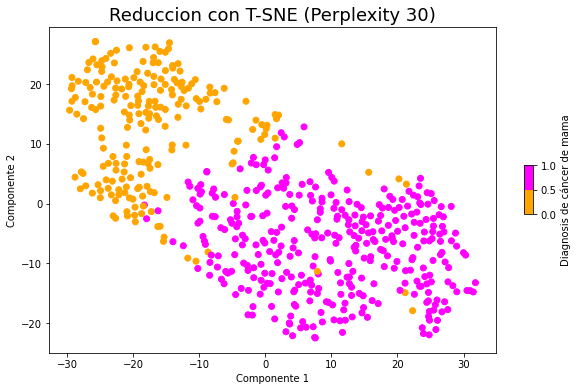

In [71]:
cmap = pltcol.ListedColormap(['orange', 'magenta'])
plt.figure(figsize=(10,6))
plt.title("Reduccion con T-SNE (Perplexity 30)", fontsize=18)
ps_tsn = plt.scatter(X_tsne30_cancer[:,0], X_tsne30_cancer[:,1], c=Y, cmap=cmap)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
cbar=plt.colorbar(ps_tsn, shrink =0.15, aspect = 5)
cbar.set_label("Diagnosis de cáncer de mama")
plt.show()

### Aplicando TSNE con 20 de perplejidad (perplexity)

In [72]:
tsne_20 = TSNE(n_components=2, perplexity=20, random_state=0)
X_tsne20_cancer = tsne_20.fit_transform(X_norm)

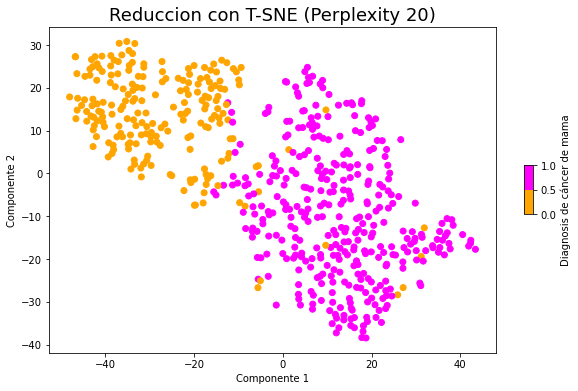

In [73]:
cmap = pltcol.ListedColormap(['orange', 'magenta'])
plt.figure(figsize=(10,6))
plt.title("Reduccion con T-SNE (Perplexity 20)", fontsize=18)
ps_tsn = plt.scatter(X_tsne20_cancer[:,0], X_tsne20_cancer[:,1], c=Y, cmap=cmap)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
cbar=plt.colorbar(ps_tsn, shrink =0.15, aspect = 5)
cbar.set_label("Diagnosis de cáncer de mama")
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> en comparación con el PCA, ¿qué método ha resultado más efectivo para visualizar las dos clases de diagnóstico de forma separada? ¿Cuándo es más apropriado usar PCA o el otro método elegido?</div>

> Al analizar gráficamente los resultados, encontramos que no existe una diferencia visual significativa para determinar cual método de reducción es mejor al momento de percibir las clases que corresponden con la diagnosis de cáncer de mama.

> No se puede determinar cual es el más apropiado, ya que los componentes principales solo son 2. En caso de obtener más componentes y de existir más de dos claes en el dataset, quizás podemos elegir un método sobre el otro.

> Es importante recordar cómo funciona cada método, el PCA, se basa en las distancias o correlaciones de los atributos y en su matriz de covarianza, por el contrario el método T-SNE es un método no lineal, que permite tener mayor flexibilidad, en caso de querer reducir a más componentes.

# 4. Entrenamiento y test (3 puntos)

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el clasificador Decision Tree (un árbol de decisión), para predecir el diagnóstico de cáncer de mama (tumor benigno o maligno) y evaluar la precisión obtenida con el modelo. Para ello usaremos:
- El conjunto de datos original con todos los atributos
- El conjunto de datos reducido a sólo 2 atributos con PCA
- El conjunto de datos sin las variables fuertemente correlacionada y reducido a sólo 2 atributos con el método PCA

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> usando el conjunto de datos original:

 - Dividid el dataset en train y test.
 - Definid un modelo Decision Tree (fijando max_depth = 5 para mantener el modelo simple).
 - Aplicad validación cruzada con el modelo definido y el dataset de train (con cv=5 ya es suficiente).
 - Calculad la media y la desviación estándar de la validación cruzada.
    
<hr>
Sugerencia: Para separar entre train y test podéis usar train_test_split de sklearn.

Sugerencia: Para entrenar un modelo decision tree podéis usar 'DecisionTreeClassifier' de sklearn.

Sugerencia: Para aplicar validación cruzada podéis usar 'cross_val_score' de sklearn.
</div>

In [86]:
# Obtenemos las variables para entrenar y testear nuestro modelo. Usamos train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)

# Definimos el clasificador Decision Tree, con profundidad máxima de 5
dtc = DecisionTreeClassifier(max_depth = 5, random_state=0)

# Aplicamos validación cruzada con un valor de cv=5
scores = cross_val_score(dtc, X_train, Y_train, cv=5)

# Calculamos la media y desviación estándar
print('Media : {:.3f}, desviación estándar: {:.3f}'.format(np.mean(scores), np.std(scores)))

Media : 0.908, desviación estándar: 0.023


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> haced el fit con todo el conjunto de train, y generad el árbol de decisión correspondiente.
    
<hr>
Sugerencia: para dibujar árboles de decisión, echad un ojo a este link:

https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

</div>

In [100]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

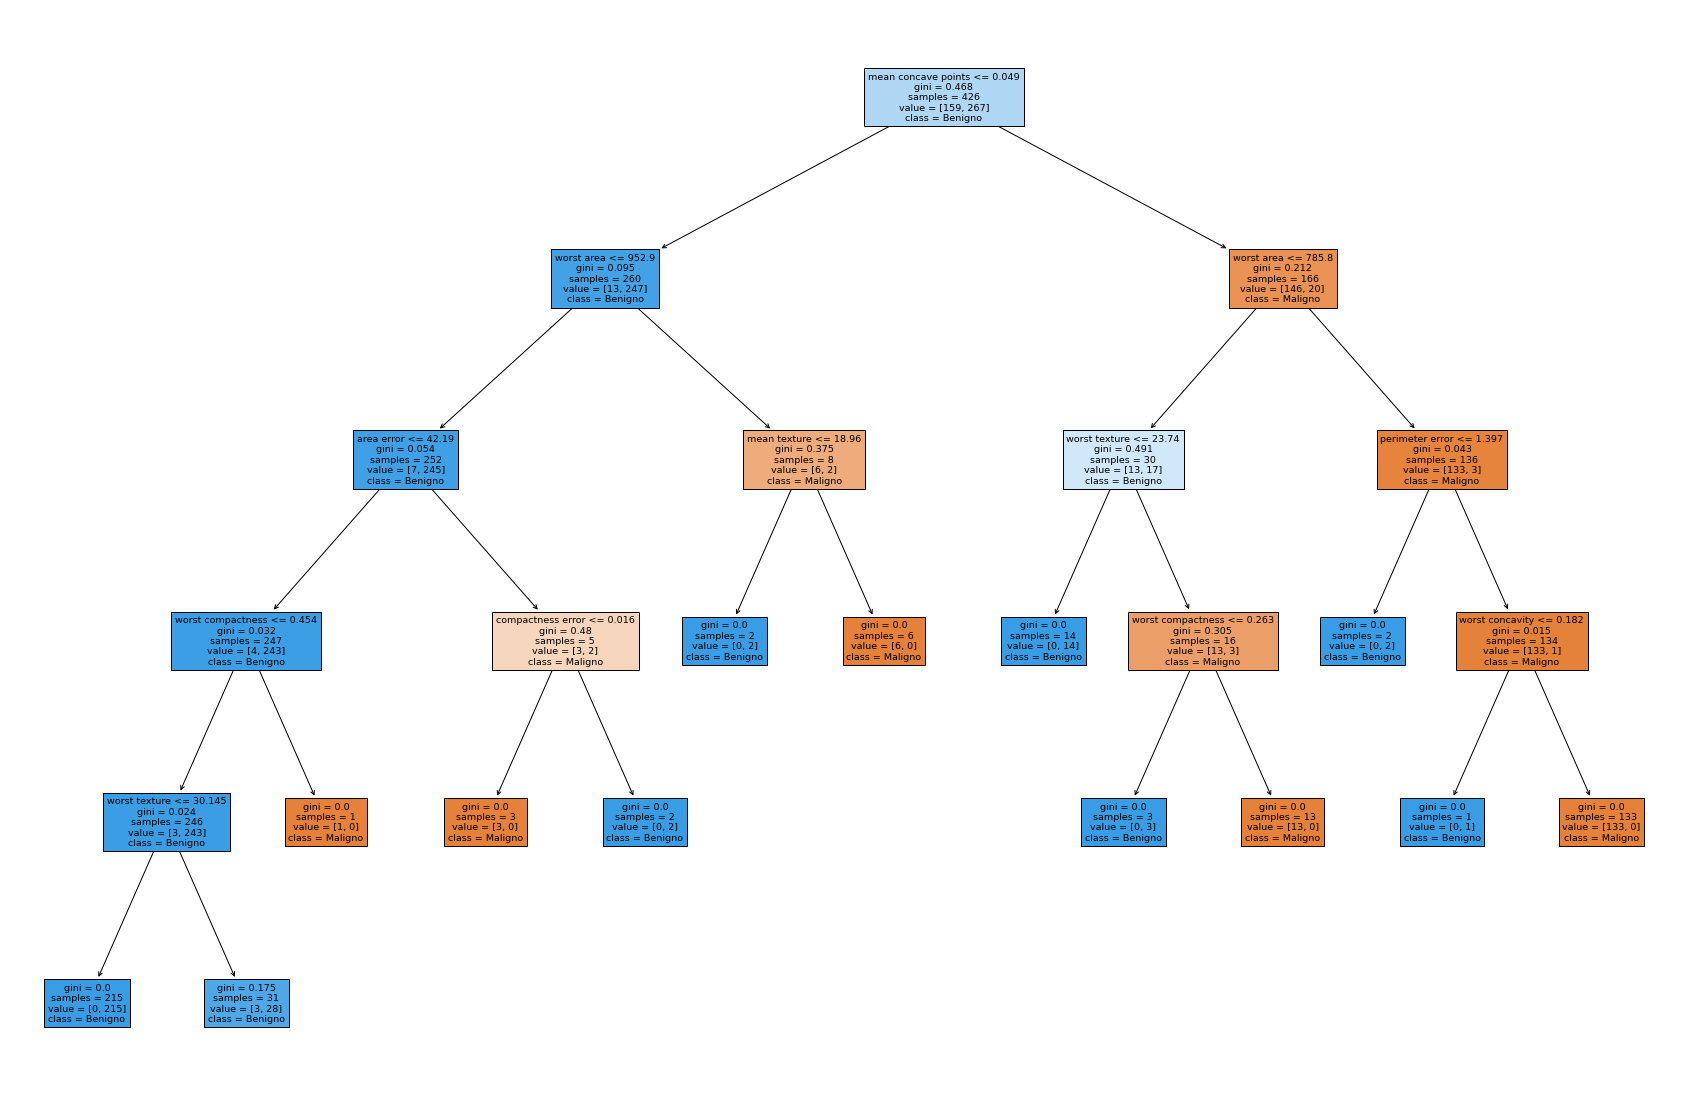

In [88]:
plt.figure(figsize=(30, 20))
tree_orig = tree.plot_tree(dtc,
               feature_names = list(X), 
               class_names= ['Maligno', 'Benigno'] ,
               filled = True)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> repetid el mismo procedimiento que en el ejercicio anterior con el dataset reducido a 2 dimensiones con PCA.
</div>

In [90]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca, Y, test_size=0.25, random_state = 0)
scores_pca = cross_val_score(dtc, X_train_pca, Y_train_pca, cv=5)
print('Media: {:.3f}, desviación estándar: {:.3f}'.format(np.mean(scores_pca), np.std(scores_pca)))

Media: 0.890, desviación estándar: 0.026


In [91]:
# Ajustar el árbol de decisión para los nuevos datasets de entrenamientos
dtc.fit(X_train_pca, Y_train_pca)

DecisionTreeClassifier(max_depth=5, random_state=0)

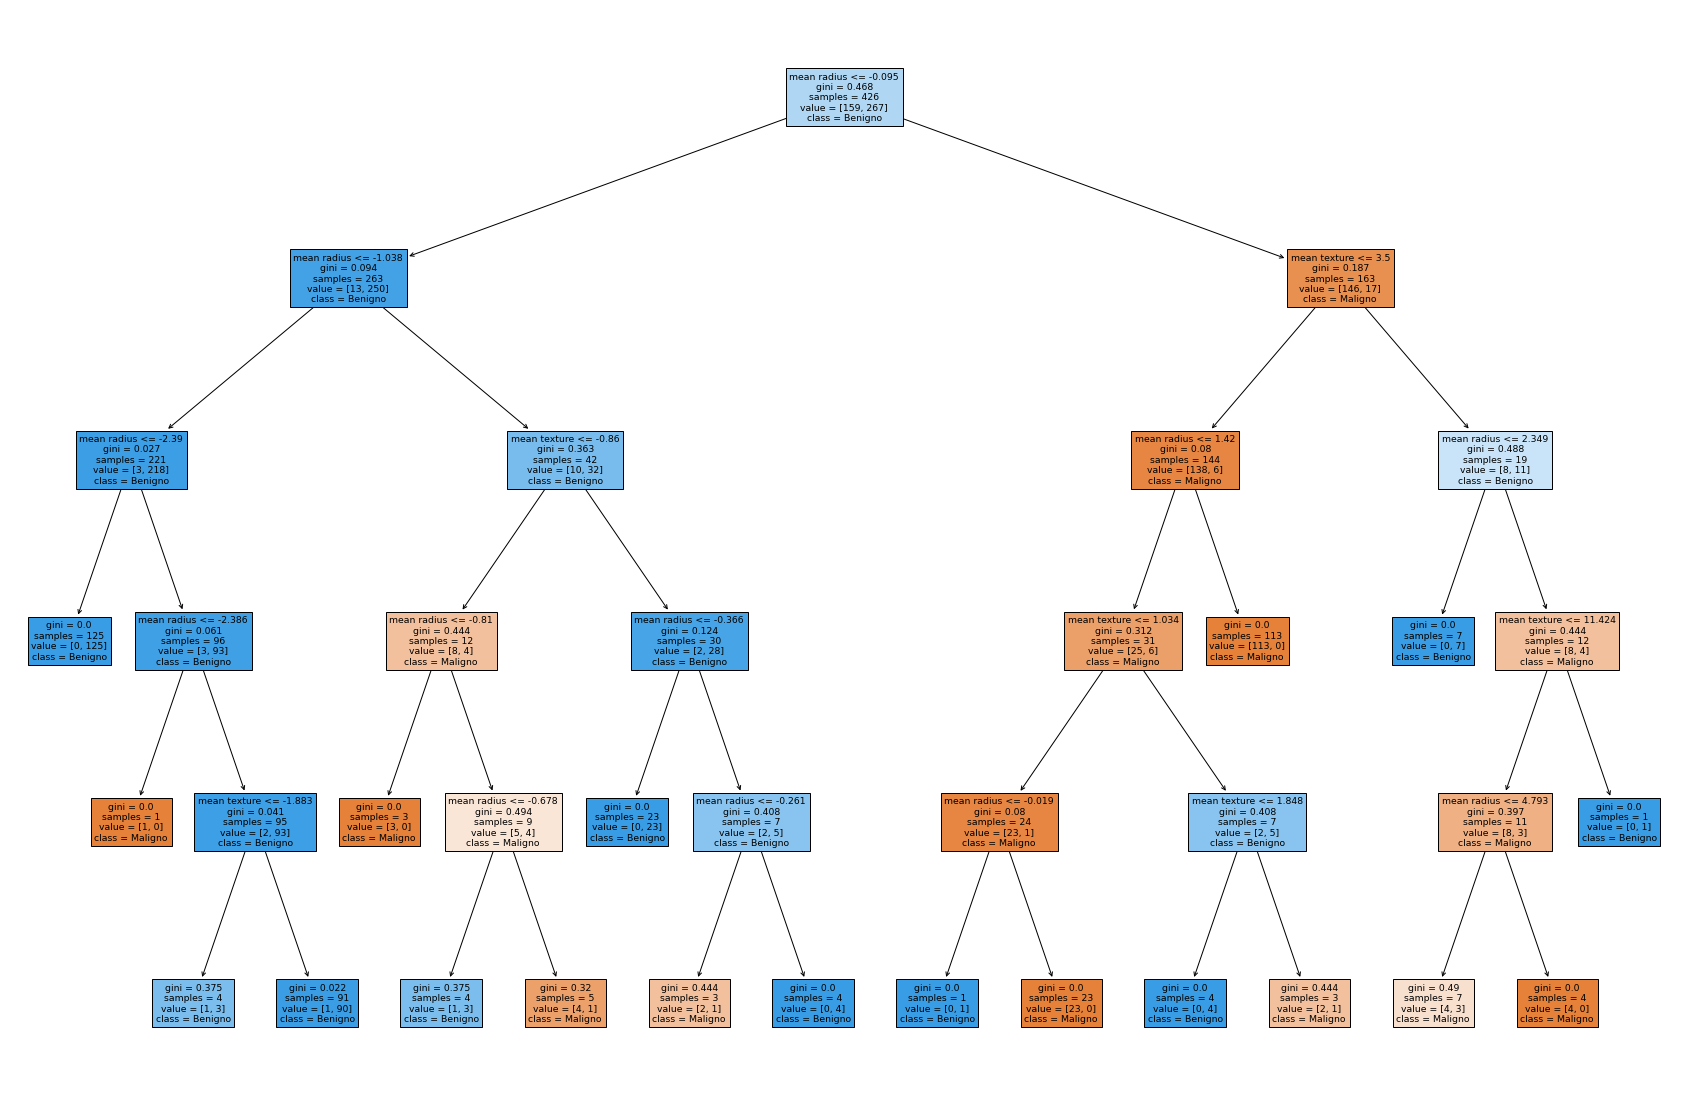

In [93]:
plt.figure(figsize=(30, 20))
tree_pca = tree.plot_tree(dtc,
               feature_names = list(X), 
               class_names= ['Maligno', 'Benigno'],
               filled = True)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> repetid el mismo procedimiento que en el ejercicio anterior con el conjunto de datos sin las variables fuertemente correlacionada y reducido a sólo 2 atributos con el método PCA.
</div>

In [94]:
X_train_pca_red, X_test_pca_red, Y_train_pca_red, Y_test_pca_red = train_test_split(X_pca_red, Y, test_size=0.25, random_state = 0)
scores_pca_red = cross_val_score(dtc, X_train_pca_red, Y_train_pca_red, cv=5)
print('Media: {:.3f}, desviación estándar: {:.3f}'.format(np.mean(scores_pca_red), np.std(scores_pca_red)))

Media: 0.901, desviación estándar: 0.023


In [97]:
# Ajustar el árbol de decisión para los nuevos datasets de entrenamientos
dtc.fit(X_train_pca_red, Y_train_pca_red)

DecisionTreeClassifier(max_depth=5, random_state=0)

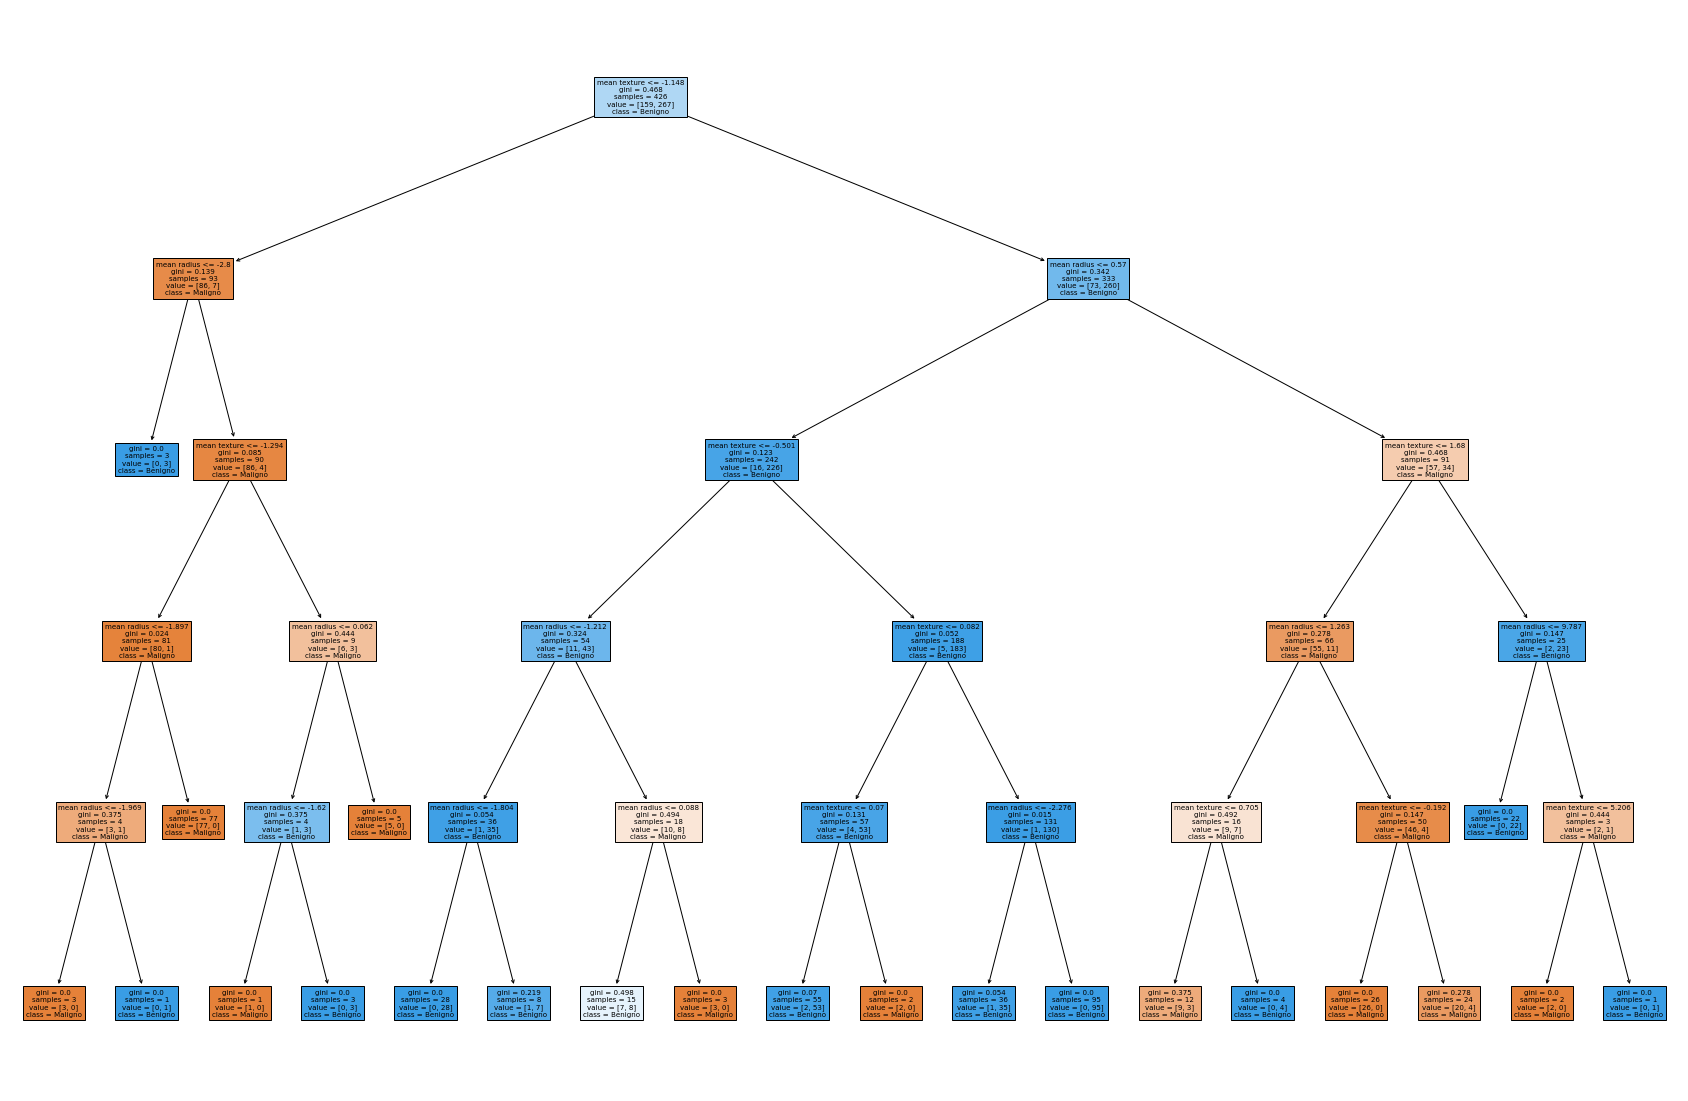

In [98]:
plt.figure(figsize=(30, 20))
tree_pca_red = tree.plot_tree(dtc,
               feature_names = list(X), 
               class_names= ['Maligno', 'Benigno'],
               filled = True)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿con qué datos ha funcionado mejor? ¿Tiene sentido? ¿Cuadra con los resultados que hemos visto en el ejercicio 3?
</div>

* Ha funcionado ligeramente mejor con el dataset original (con todas las variables), ya que se obtiene una media mayor al resto de scores obtenidos y una desviación estándar más pequeña, esto quiere decir que las iteraciones ejecutadas estaban cercanas a la media.

* Estos resultados concuerdan con los obtenidos en el ejercicio anterior, donde pudimos ver que visualmente todos los métodos separaban las clases con un nivel aceptable, sin tener mayor ventaja ninguno sobre el otro de manera contundente.

* Si cuadra con los resultados del ejercicio 3, ya que en ningún caso se vió una diferencia clara en la separación de las clases que corresponden a la diagnosis de cáncer de mama. Graficamente, en el gráfico del ejercicio 3 con título "Componentes Principales (con variables correlacionadas)", se visualizan las nubes de puntos mejor definidas. No ocurre así para el análisis del gráfico "Componentes Principales (Sin variables correlacionadas)"

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> con el mejor modelo que hayáis obtenido:
    
 - Generad predicciones sobre el dataset de test.
 - Calculad la precisión de las predicciones obtenidas y la matriz de confusión asociada.
 
<hr>
Sugerencia: para calcular la precisión y la matriz de confusión podéis usar las funciones dentro del módulo "metrics" de sklearn.
</div>

In [103]:
# Previamente ajustamos el árbol de decisión al dataset de entramiento que corresponde al mejor modelo
dtc.fit(X_train, Y_train)
# Generamos las predicciones sobre el dataset de test que corresponde al mejor modelo
Y_pred = dtc.predict(X_test)

In [106]:
# Calculamos la precisión de la predicción y la matriz de confusión asociada.
print("Precisión de la predicción:\n", accuracy_score(Y_test, Y_pred))
print("Matriz de confusión:\n", confusion_matrix(Y_test, Y_pred))

Precisión de la predicción:
 0.8951048951048951
Matriz de confusión:
 [[51  2]
 [13 77]]
